In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
from scipy.optimize import minimize

import clarsach
import xpysis

%matplotlib inline

In [2]:
DATA_DIR = os.environ['HOME'] + "/dev/clarsach/data"
mrk_dir  = DATA_DIR + "/tgcat/obs_15477_tgid_4679/"
mrk_heg1_file = mrk_dir + "heg_1.pha"

In [3]:
mrk421 = xpysis.Spectrum(mrk_heg1_file, telescope='HETG')

In [8]:
mrk421_bkg = xpysis.BkgSpectrum(mrk_heg1_file)

**Test plotting before assigning background**

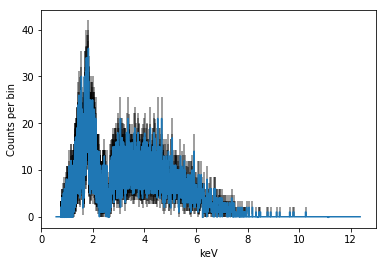

In [9]:
ax = plt.subplot(111)
xpysis.plot_counts(ax, mrk421)

**Test plotting after assigning background**

In [10]:
mrk421.assign_bkg(mrk421_bkg)

[]

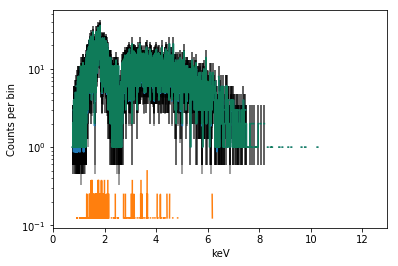

In [12]:
ax = plt.subplot(111)
xpysis.plot_counts(ax, mrk421)
xpysis.plot_counts(ax, mrk421, bkgsub=False, color='g', alpha=0.5)
plt.plot(mrk421_bkg.bin_mid, mrk421_bkg.counts * mrk421_bkg.backscal)
plt.semilogy()

In [15]:
lo, hi, cts0, cts_err0 = mrk421.bin_counts(bkgsub=False)
lo, hi, cts1, cts_err1 = mrk421.bin_counts(bkgsub=True)
lo, hi, cts2, cts_err2 = mrk421.bin_counts(bkgsub=True, usebackscal=False)

print(any(cts0 != cts1))
print(any(cts1 != cts2))

True
True


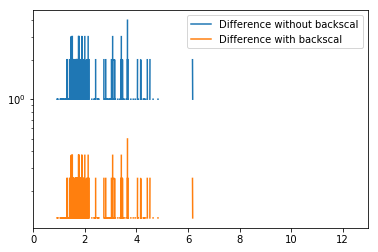

In [21]:
mid = 0.5 * (lo + hi)
plt.plot(mid, cts0-cts2, label='Difference without backscal')
plt.plot(mid, cts0-cts1, label='Difference with backscal')
plt.semilogy()
plt.legend(loc='upper right')

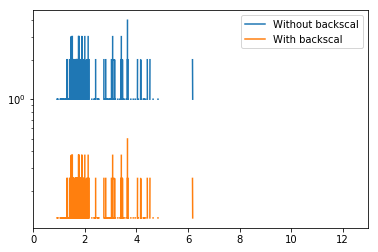

In [22]:
plt.plot(mrk421.bkg.bin_mid, mrk421.bkg.counts, label='Without backscal')
plt.plot(mrk421.bkg.bin_mid, mrk421.bkg.counts * mrk421.bkg.backscal, label='With backscal')
plt.semilogy()
plt.legend(loc='upper right')